<h1><center> INTRODUCTION TO ROOT</center></h1>

<img src="./images/root_logo.png" width = 400>

If you were hanging around some experimental particle physics, you might have heard someone mention about ROOT. ROOT is an OOP library, and acts as the main data analysis framework for High Energy Physics. Its usage has expanded, due to its versatility, to other fields as well, such as astronomy and data mining. If you want to be an experimental high energy physicist, you need to know ROOT.

ROOT has a lot of stuff that we will go through over the course of this tutorial, that even some other data analysis libraries have only just adopted them recently.

ROOT is compatible with Python and C++. Python has its simplicity and straightforwardness, while C++ is more powerful in terms of data handling and processing. So, it will be good if you can use ROOT in both languages.

For this set of tutorial, we will mainly be using Python. 

This is where the magic begins. Firstly, import the library.

In [1]:
import ROOT

Welcome to JupyROOT 6.22/00


# Basic Math

In terms of data type, ROOT has its own set of data types, but it still can accept and use normal data types. Let's start off with ROOT's basic mathematical class, **TMath**. Its full documentation can be found [here](https://root.cern.ch/doc/v612/namespaceTMath.html).

TMath stores a lot of mathematical functions, some of them you may never end up using explicitly but is used a lot in the other implementations. 

In [2]:
pi   = ROOT.TMath.Pi()
rad  = 5
area = pi*(rad**2)
print("The area of the circle with radius ", rad, " is ", area)

The area of the circle with radius  5  is  78.53981633974483


In [3]:
x   = 0.235
erf = ROOT.TMath.Erf(x)
print("The error function value at x = ", x, "is ", erf)

The error function value at x =  0.235 is  0.2603676022513831


In [4]:
y    = 0.2555
tanh = ROOT.TMath.TanH(y)
print("tanh(", y, ") = ", tanh)

tanh( 0.2555 ) =  0.2500817370778593


As you can see above, ROOT handles well with normal data types. Though, in practicality you can interchange between using the widely used NumPy and SciPy libraries as well, which one you are comfortable with. Up next, is functions.

# TF1: 1-D Functions

Now, we will see how powerful ROOT can be. TF1 is a class specifically, to handle functions of a single variable. Full documentation [here](https://root.cern.ch/doc/master/classTF1.html).

The function is controlled by the [TFormula](https://root.cern.ch/doc/master/classTFormula.html) expressions, but generally its straightforward.

The basic syntax in Python is:

```
func = ROOT.TF1(name, formula, lower limit, upper limit, extra options)
```


In [5]:
y = ROOT.TF1("function_y", "pow(x, 2)+5*x-4", -10, 10)

We will use the ```Eval()``` method to evaluate the function at a specific point, and draw it out. To draw something, we will need to draw it on a [TCanvas](https://root.cern.ch/doc/master/classTCanvas.html).

The value of function y at x = 5 is  46.0


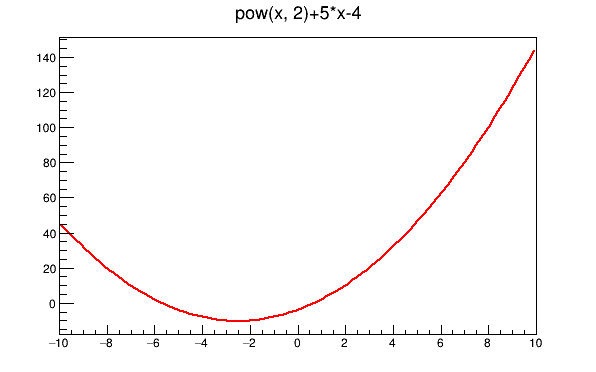

In [6]:
print("The value of function y at x = 5 is ", y.Eval(5))

canv = ROOT.TCanvas("myCanv", "f(x) = x^2 + 5x -4", 600, 400)
y.Draw()

canv.Draw()

You can also define the function with empty parameters that can be filled afterwards. The parameters can then be set by the ```SetParameter()``` method.

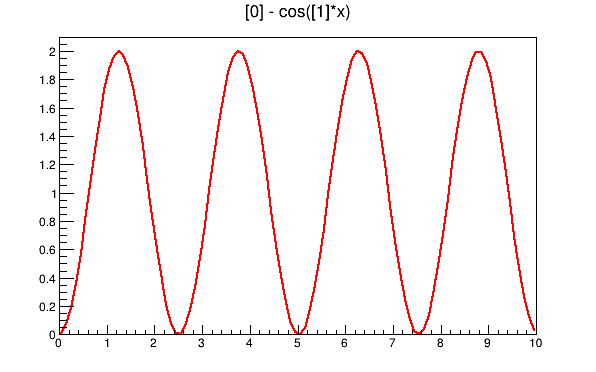

In [7]:
y2 = ROOT.TF1("myFunc", "[0] - cos([1]*x)", 0, 10)

# setting the first parameter, then the second
y2.SetParameter(0, 1)
y2.SetParameter(1, 2.5)

y2.Draw()
canv.Draw()

# TF2: 2-D Functions

Following from TF1, TF2 is just a 2-dimensional implementation of it. Just add another variable

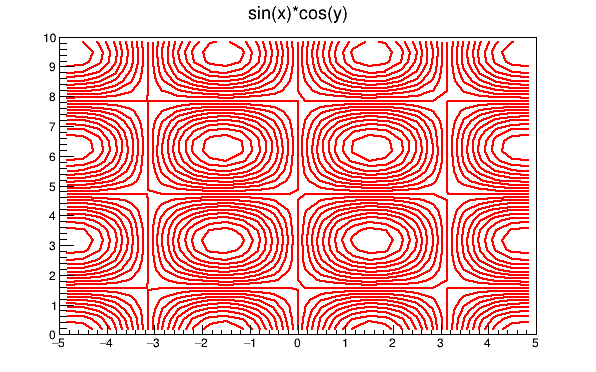

In [8]:
func = ROOT.TF2("f2", "sin(x)*cos(y)", -5, 5, 0, 10)
func.Draw()
canv.Draw()

# TGraph: Plotting Points

The ROOT implementation to plot data points on a cartesian plane is the TGraph class. THe basic constructor is as follows:

```
gr1 = ROOT.TGraph(number of points)
```


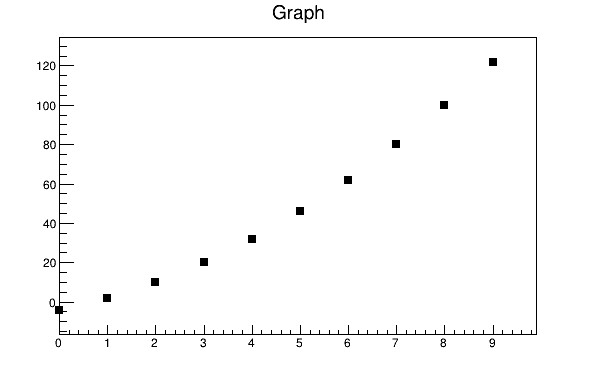

In [12]:
import numpy as np

xg    = np.arange(0, 10, 1)
graph = ROOT.TGraph(len(xg))

# plotting the point
for i, xgi in enumerate(xg):
    yg = y.Eval(xgi)
    graph.SetPoint(i, xgi, yg)

# plotting aesthetics
canv.Clear()
graph.SetMarkerColor(ROOT.kBlack)
graph.SetMarkerStyle(21)
graph.SetMarkerSize(1)
graph.Draw("AP")

canv.Draw()


The plots are all customizable using the painter classes, such as TGraphPainter for TGraph and THistPainter for TH (which you will learn later). Side note, the most tiring part about HEP that every particle physicist will admit is plotting. Sigh.

## Fitting TGraph with TF1

There is a much more sophisticated fitting method available with ROOT via RooFit, but we will learn the basic one first. Suppose you have a set of points like the graph above. You can fit a line to it approximately.

Here, we are fitting the previous graph with a 2nd order polynomial function.


****************************************
Minimizer is Linear / Migrad
Chi2                      =  6.76567e-27
NDf                       =            7
p0                        =           -4   +/-   2.44436e-14 
p1                        =            5   +/-   1.26487e-14 
p2                        =            1   +/-   1.35297e-15 


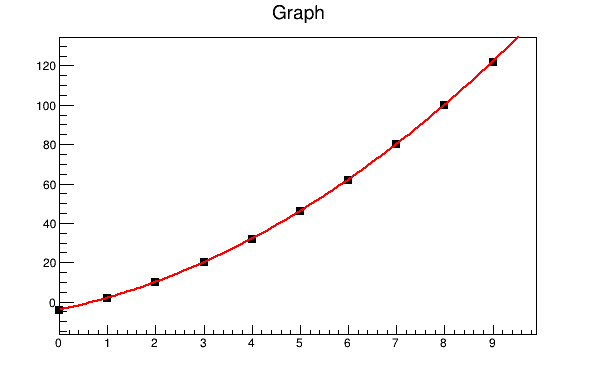

In [13]:
fitFunc = ROOT.TF1("fitFunc", "pol2", 0, 10)
graph.Fit("fitFunc", "S")

graph.Draw("AP")
canv.Draw()

TGraph has a number of derived classes designed for certain usage like TGraph2D for a 2-dimensional plot on the (x, y, z) planes, TGraphAsymmErrors for graphs with points that have asymmetric error bars. Going through them one by one would be too exhaustive for this tutorial, so we encourage you to explore on your own later.

# TH1: Histograms

Now, we get to the meaty part of ROOT. Histograms. It is very useful to visualise measurements and data. The TH1 is the base class for all other histogram classes. We will use TH1F for now.

```
hist = ROOT.TH1F(name, title, number of bins, lower limit, upper limit)
```


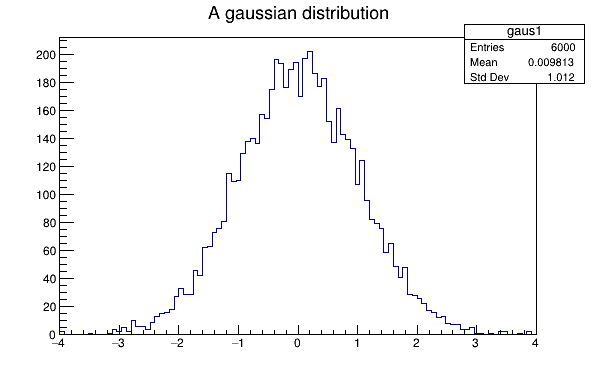

In [14]:
h1 = ROOT.TH1F("gaus1",  "A gaussian distribution", 100, -4, 4)

# randomly filling the histogram using a gaussian probability density function
h1.FillRandom("gaus", 6000)

canv.Clear()
h1.Draw()
canv.Draw()

Let's simulate a common distribution you would see in particle physics.

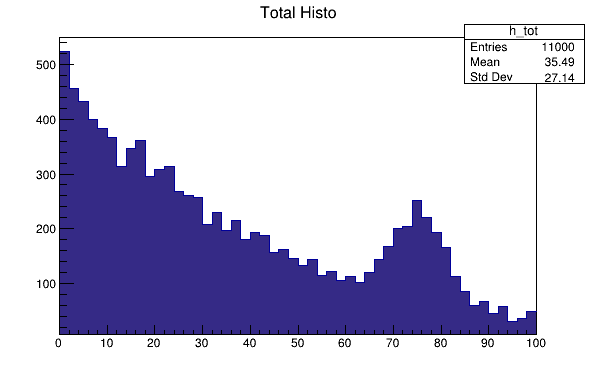

In [15]:
h_sig = ROOT.TH1F("h_sig", "Signal Histo",     50, 0, 100)
h_bkg = ROOT.TH1F("h_bkg", "Background Histo", 50, 0, 100)
h_tot = ROOT.TH1F("h_tot", "Total Histo",      50, 0, 100)

# measurement simulation
rnd_gen = ROOT.TRandom3()

for i in range(0, 10000):
    if i%10 == 0: h_sig.Fill(rnd_gen.Gaus(75, 5))
    h_bkg.Fill(rnd_gen.Exp(40))

h_tot.Add(h_sig)
h_tot.Add(h_bkg)

canv.Clear()
h_tot.Draw("PFC")
canv.Draw()

If we want to see the composition of the histogram, we would need to use the THStack class. We would see this.

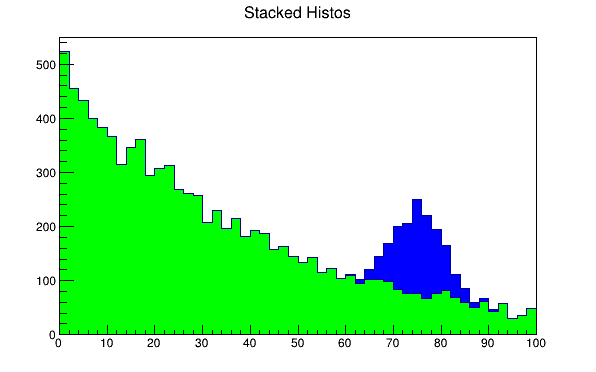

In [16]:
h_sig.SetFillColor(ROOT.kBlue)
h_bkg.SetFillColor(ROOT.kGreen)

hs = ROOT.THStack("hs", "Stacked Histos")
hs.Add(h_bkg)
hs.Add(h_sig)

canv.Clear()
hs.Draw()
canv.Draw()

# TH2: 2-D Histograms

Same concept as before, but now for 2-dimensions. This might be useful when an interesting distribution might lie correlated between two variables.

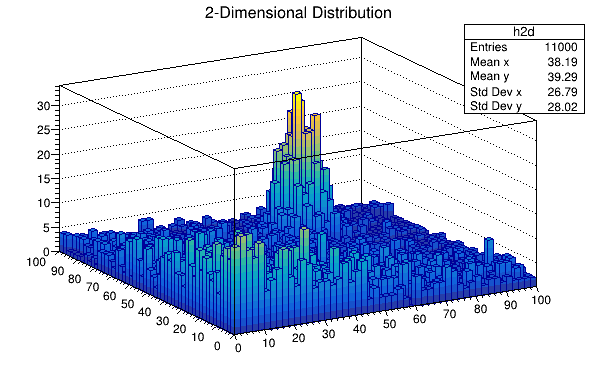

In [17]:
h2d = ROOT.TH2F("h2d", "2-Dimensional Distribution", 
                50, 0, 100, # x-axis 
                50, 0, 100) # y-axis

for i in range(10000):
    if i%10 == 0: h2d.Fill(rnd_gen.Gaus(65, 5), rnd_gen.Gaus(75, 5))
    h2d.Fill(rnd_gen.Exp(50), rnd_gen.Exp(50))
    
canv.Clear()
h2d.Draw("lego2")
canv.Draw()



# TFile: File Handling and I/O

A lot of times, data will be stored in files to ensure ease of handling. In terms of ROOT, you can store literal ROOT objects inside ROOT files. To open, write and read those files, we will need to use the TFile class.

Let's take a look at a file containing Monte Carlo simulation.


In [18]:
# opening a file
file = ROOT.TFile("./rootfiles/signal.root", "OPEN")

# listing down the file contents
file.ls()

TFile**		./rootfiles/signal.root	
 TFile*		./rootfiles/signal.root	
  KEY: TTree	elel;1	elel
  KEY: TTree	mumu;1	mumu


A breakdown on the 3rd and 4th line is like this:

```
KEY: TObject TKey;1 object_name
```

The TKey is used to obtain the objects or directories in the file.

If you want to create a new file instead, just replace the ```"OPEN"``` option in the constructor into ```"RECREATE"```. A TFile will be open throughout the time until the ```Close()``` method is used. Every TObject can be saved via the ```Write()``` method.

# TTree: Columnar Data

TTree is how ROOT saves data into rows and columns, where the rows are usually events while the columns contain the quantities. It is optimized to store large quantities of all sorts of data, making reading the contents much more faster.

Let's extract a tree from the file and see what's inside.

In [19]:
# taking a TObject from the TFile using a TKey
elel_tree = file.Get("elel")

# printing the contents of the tree
elel_tree.Print()

******************************************************************************
*Tree    :elel      : elel                                                   *
*Entries :     7748 : Total =         2413556 bytes  File  Size =    1442976 *
*        :          : Tree compression factor =   1.65                       *
******************************************************************************
*Br    0 :sampleID  : sampleID/I                                             *
*Entries :     7748 : Total  Size=      31564 bytes  File Size  =        267 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression= 116.36     *
*............................................................................*
*Br    1 :evtWeight : evtWeight/F                                            *
*Entries :     7748 : Total  Size=      31569 bytes  File Size  =        268 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression= 115.93     *
*...................................................

The tree contains branches, which signifies the quantity column we mentioned before. Each event entry carries those data. To see it in a columnar way:

In [20]:
#scanning the rows and columns
elel_tree.Scan()

7748

************************************************************************************************************
*    Row   * sampleID. * evtWeight * evtWeight * passMassV * passMassH * passMassS * passDeepT * passDeepT *
************************************************************************************************************
*        0 *  44169999 * 0.0104914 * 0.0096148 *         1 *         0 *         0 *         1 *         1 *
*        1 *  44169999 * 0.0104914 * 0.0075141 *         1 *         0 *         0 *         1 *         1 *
*        2 *  44169999 * 0.0104914 * 0.0110606 *         0 *         1 *         0 *         1 *         1 *
*        3 *  44169999 * 0.0104914 * 0.0103957 *         1 *         0 *         0 *         0 *         0 *
*        4 *  44169999 * 0.0104914 * 0.0106811 *         1 *         0 *         0 *         0 *         0 *
*        5 *  44169999 * 0.0104914 * 0.0115447 *         1 *         0 *         0 *         1 *         1 *
*        6 *  44169

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or 

We can also draw one of the branches from the tree and see the distribution.

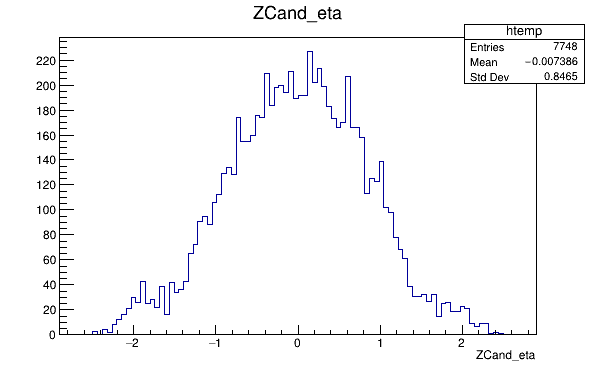

In [21]:
canv.Clear()
elel_tree.Draw("ZCand_eta")
canv.Draw()

To create a histogram from a tree:

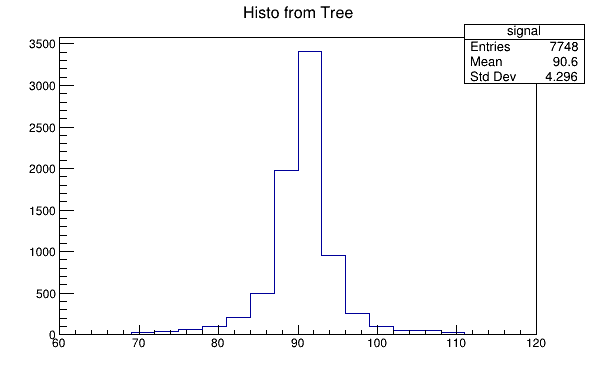

In [47]:
signal = ROOT.TH1F("signal", "Histo from Tree", 20, 60, 120)
elel_tree.Draw("ZCand_mass>>signal")

canv.Clear()
signal.Draw()
canv.Draw()

# TChain: Chaining a Number of ROOT Files

If we want to lump together a group of ROOT files that are meant to used collectively, then we would use TChain. In a sense, we would use it like how we use a TTree, because it inherits from it.

In [48]:
# intialize the chain with the name of the TTree we want to extract
bkgd = ROOT.TChain("elel")

bkgd.Add("./rootfiles/bkg_main.root")
bkgd.Add("./rootfiles/bkg_diboson.root")
bkgd.Add("./rootfiles/bkg_top.root")

bkgd.Print()

******************************************************************************
*Chain   :elel      : ./rootfiles/bkg_main.root                              *
******************************************************************************
******************************************************************************
*Tree    :elel      : elel                                                   *
*Entries :   306137 : Total =        98843887 bytes  File  Size =   60832082 *
*        :          : Tree compression factor =   1.62                       *
******************************************************************************
*Br    0 :sampleID  : sampleID/I                                             *
*Entries :   306137 : Total  Size=    1230850 bytes  File Size  =      13148 *
*Baskets :       63 : Basket Size=      32000 bytes  Compression=  93.50     *
*............................................................................*
*Br    1 :evtWeight : evtWeight/F                   

Warning in <TROOT::Append>: Replacing existing TH1: bkgdHist (Potential memory leak).


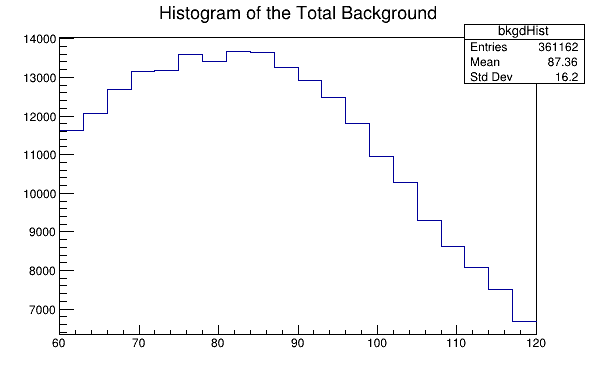

In [49]:
bkgdHist = ROOT.TH1F("bkgdHist", "Histogram of the Total Background", 20, 60, 120)

bkgd.Draw("VCand_mass>>bkgdHist")

canv.Clear()
bkgdHist.Draw()
canv.Draw()

# A Simple Efficiency Analysis with TEfficiency

A simple efficiency analysis can be done using the TEfficiency class. In the example below, we took the total background and try to see what happens when we try to add certain restrictions. In this case, any event that has ```VCand_mass``` more than 65 or less than 125 would not be included into the histogram ```h2```. This can be done by inserting a cut via TCut in the ```Draw()``` method.

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


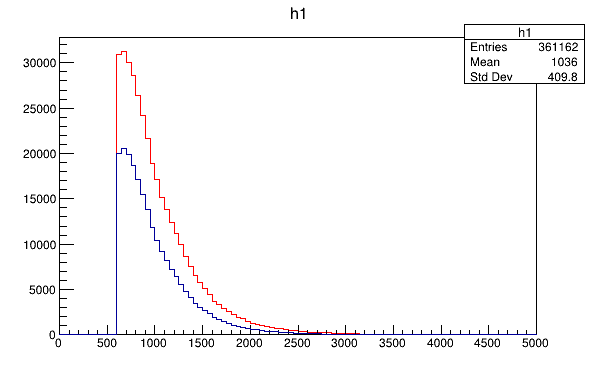

In [51]:
h1 = ROOT.TH1F("h1", "h1", 100, 0, 5000)
h2 = ROOT.TH1F("h2", "h2", 100, 0, 5000)

bkgd.Draw("ZVCand_mass>>h1")
bkgd.Draw("ZVCand_mass>>h2", "VCand_mass>65&&VCand_mass<125")

canv.Clear()
h1.SetLineColor(ROOT.kRed)
h1.Draw()
h2.Draw("SAME")
canv.Draw()

With the two histograms, we feed it into TEfficiency.

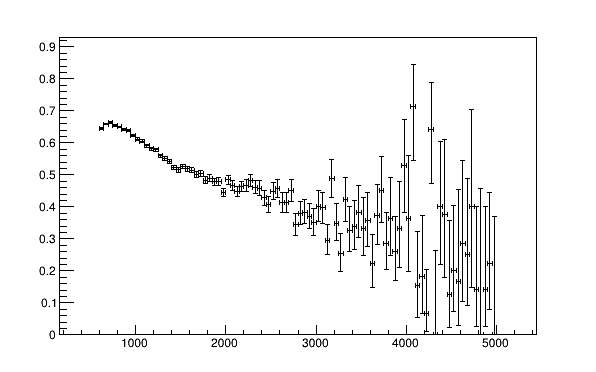

In [52]:
eff = ROOT.TEfficiency(h2, h1)

canv.Clear()
eff.Draw()
canv.Draw()

What we will get is essentially the later histogram with the cuts divided by the total histogram, then we can see how the cut affects the data distribution.

